<a href="https://colab.research.google.com/github/kiraaa66/algGNEP/blob/main/SGDlin1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Such

In [118]:
import numpy as np
from scipy.optimize import minimize
#!python -m pip install -U pandas
import pandas as pd
import itertools
import jax.numpy as jnp
from jax import random as jrandom
from jax import nn as jnn
from jax import jit
import numpy as np
from numpy import random

import random
import math
import time
import sys
import jax
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint
from scipy import stats
#!pip install scikit-learn
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

# Randomize Function

In [119]:
def randomY(maxY, minY):
  return random.uniform(minY, maxY)

#Graphing the boundaries of the problem

In [120]:
def newLine(xVal): #returns the y value of any x coordinate on the line
  return (-1 * xVal) + 1

#Generate & Set Children

In [121]:
#alpha = np.random.normal(loc = 0.0, scale = 1.0, size = 1)
def generateChild():
  #alpha = np.random.normal(loc = 0.5, scale = 0.5/2.0, size = 1)
 # i = int(a/50)
  #https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
  #https://www.w3schools.com/python/numpy/numpy_random_normal.asp
  child = np.random.normal(loc = 0.0, scale = abs(0.99 ** num)/2.0, size = 5000)
  #print(child)
  return child

In [122]:
def addChild(childX, val):
  i = int(val/50)
  childX += setX[i]
  #childY += setY[val]
  #val += 1
  return childX

In [123]:
def addChild2(childY, val):
  i = int(val/50)
  childY += setY[i]
  #childY += setY[val]
  #val += 1
  return childY

In [124]:
def addParent(parent, b):
  parent += b
  return parent

#Evaluation of Children

In [125]:
#https://www.youtube.com/watch?v=VVEbwuyoWkU
def gold(func, xl, xu):

  ea = 100
  i = 1

  ratio = (5 ** 0.5 - 1) / 2
  d = ratio * (xu - xl)
  x1 = xl + d
  x2 = xu - d

  f1 = func(x1)
  f2 = func(x2)

  while ea > 0.1:
    if f1 < f2:
      xl = x2
      x2 = x1
      f2 = f1
      x1 = xl + ratio*(xu-xl)
      f1 = func(x1)
    else:
      xu = x1
      x1 = x2
      f1 = f2
      x2 = xu - ratio*(xu-xl)
      f2 = func(x2)

    if f1 < f2:
      xopt = x1
    else:
      xopt = x2

    #print(xopt)
    ea = (1 - ratio) * abs((xu - xl) / xopt) * 100
    i += 1

  return xopt

In [126]:
def pen(a,b):
  #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.golden.html
  def func1(x):
    return (x-1)**2

  def func2(x):
    return (x-0.5)**2

  min1 = gold(func1, 0.00001, 1.0-b)
  min2 = gold(func2, 0.00001, 1.0-a)
  #print(min1)
  shadowX = min1
  shadowY = min2

  pen = math.sqrt((math.pow(a-shadowX,2))+(math.pow(b-shadowY,2)))
  #print(pen)
  return pen

#Transformation of Points

In [127]:
def transform(a,b,c):
  i = int(c/50)
  newSum = b * (penaltyParent[i] - a)
  return newSum

In [128]:
#https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html#:~:text=ndarrays%20can%20be%20indexed%20using,%2C%20basic%20slicing%2C%20advanced%20indexing.
def add(b, c):
  beta = 0

  i = b % 50

  if i == 0:
    for j in range(50):
      k = b + j
      beta += c[k]
    return beta


# Declaring All Arrays

In [129]:
#https://www.studytonight.com/python-howtos/how-to-declare-an-array-in-python
#https://linuxhint.com/numpy-create-2d-array/
#https://www.pluralsight.com/guides/different-ways-create-numpy-arrays
setXY = np.zeros(200)
setXY = setXY.reshape(100,2)

setX = np.empty(100, dtype=object)
setY = np.empty(100, dtype=object)

children = np.zeros(5000)
#childrenX = childrenX.reshape(100, 50)
childrenY = np.zeros(5000)
#childrenY = childrenY.reshape(100, 50)
sum1 = np.zeros(5000)
beta = np.zeros(100)

# Runthrough of Code

[   0    1    2 ... 4997 4998 4999]


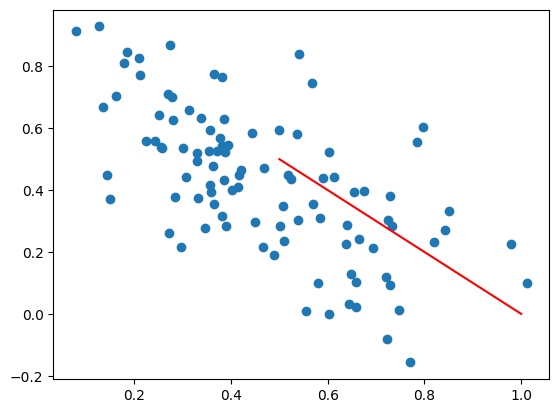

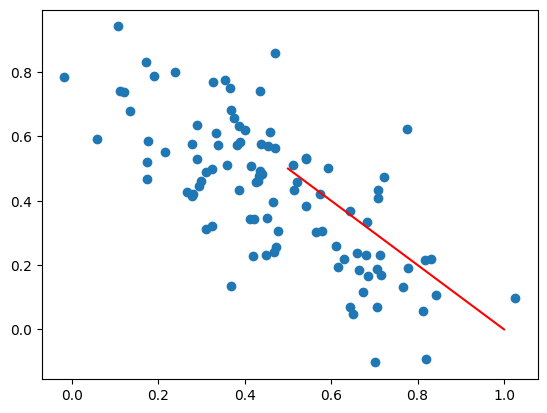

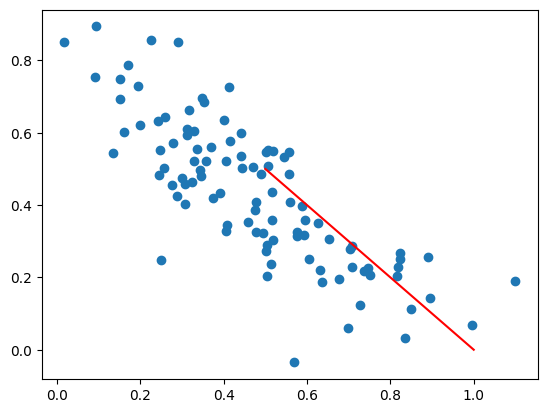

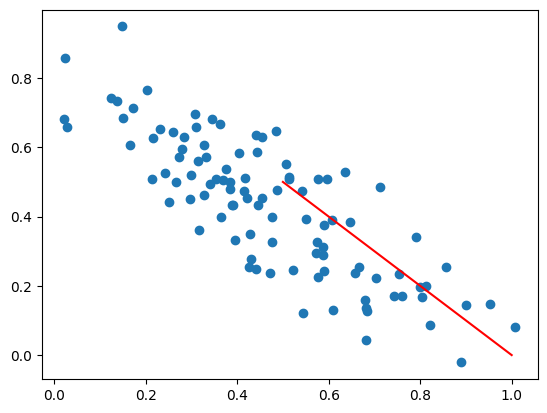

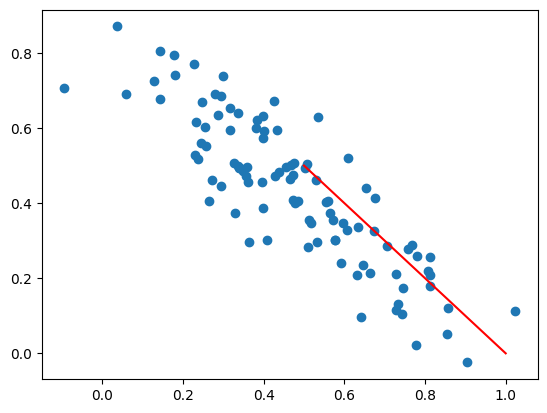

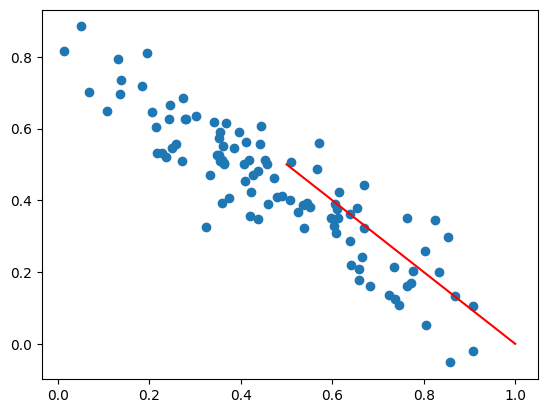

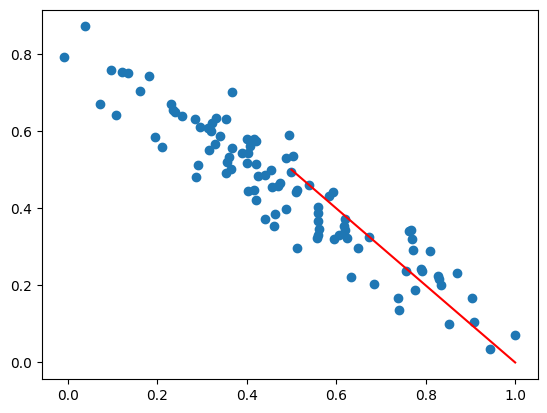

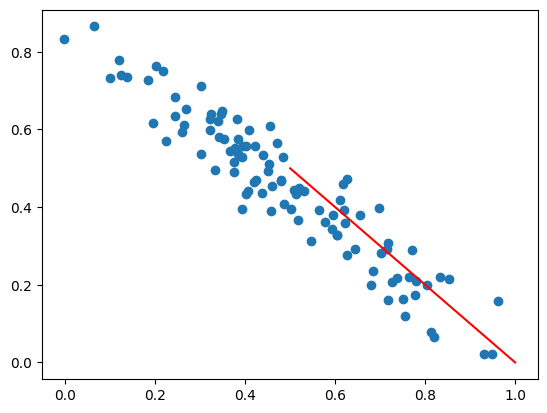

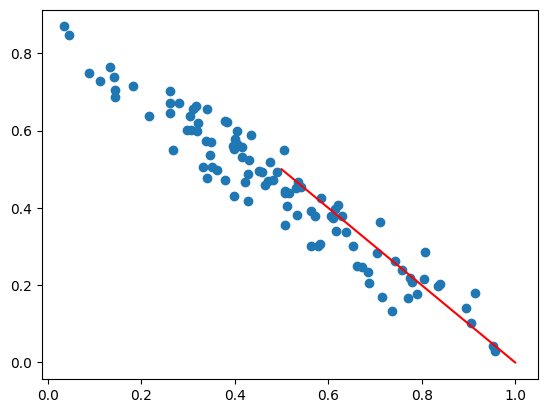

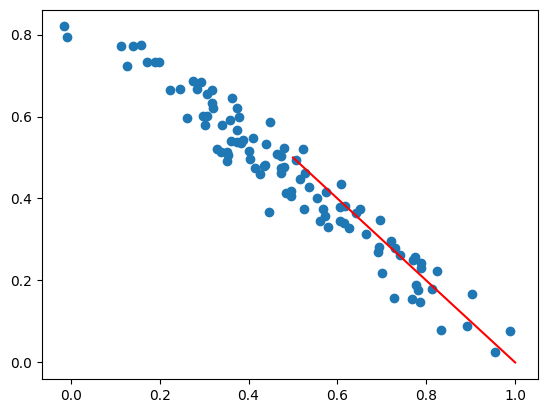

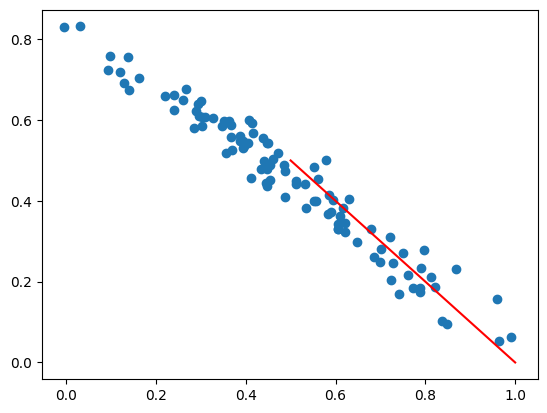

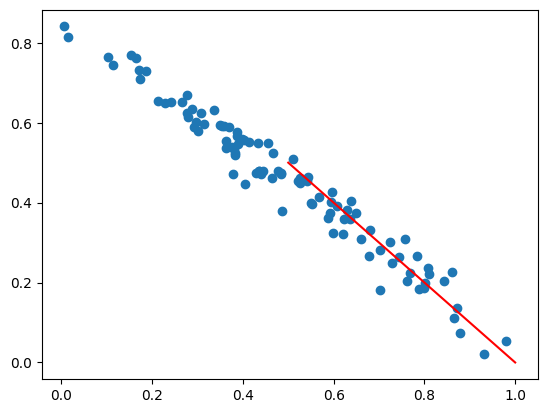

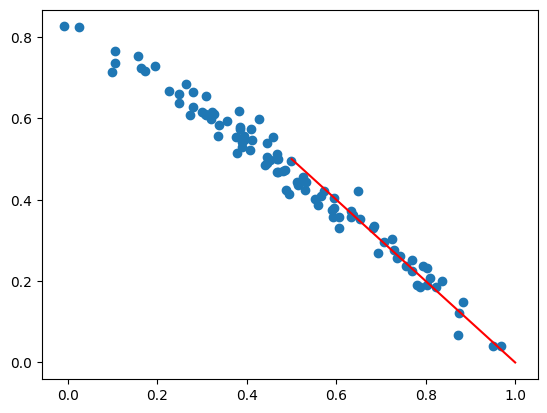

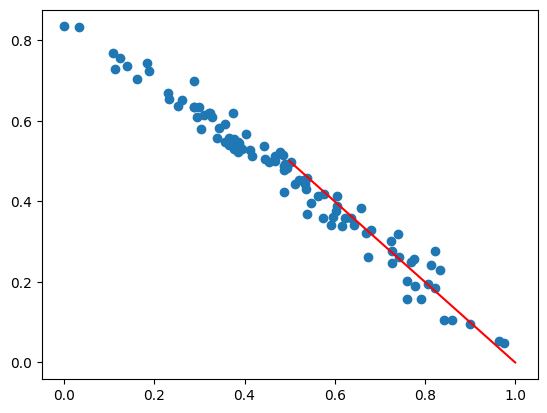

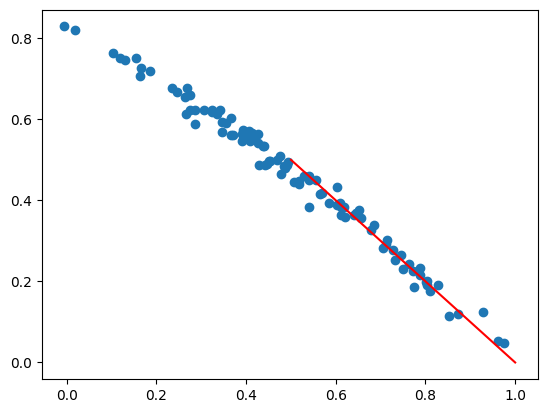

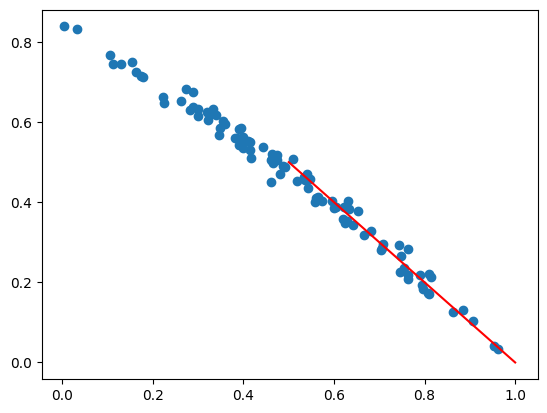

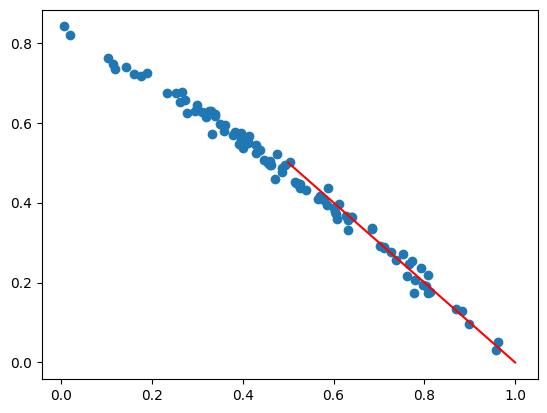

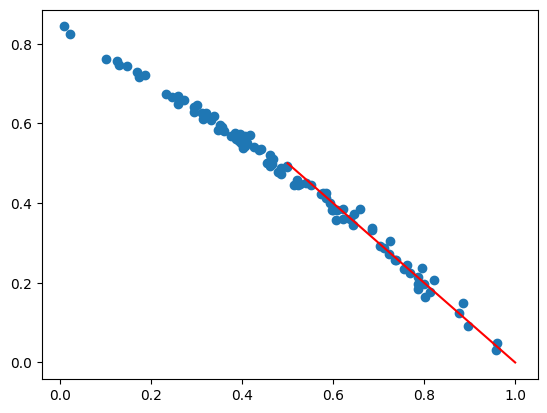

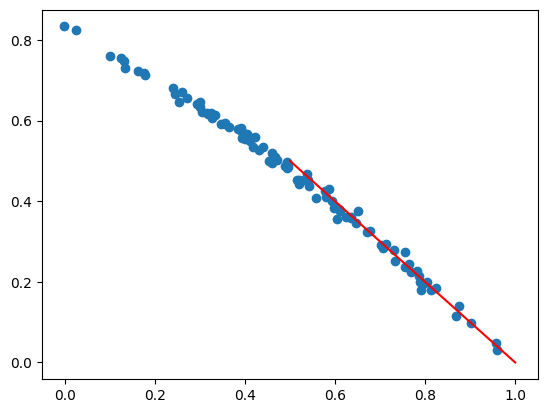

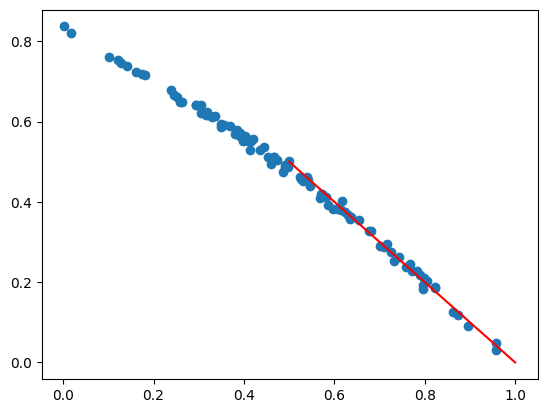

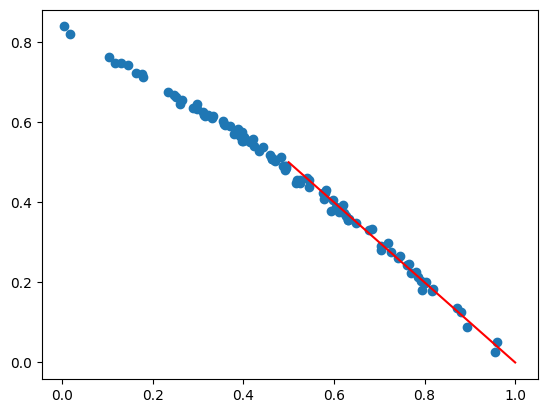

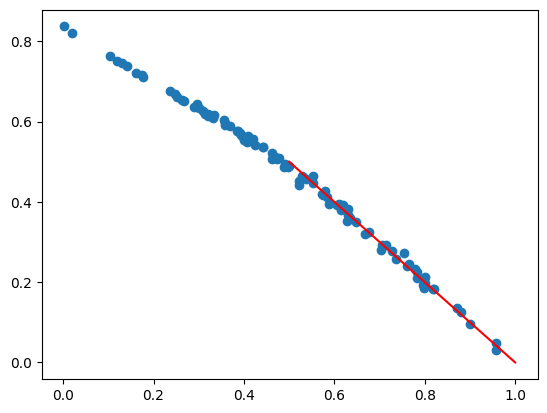

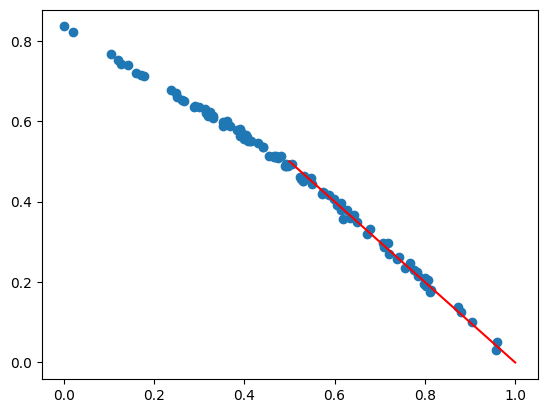

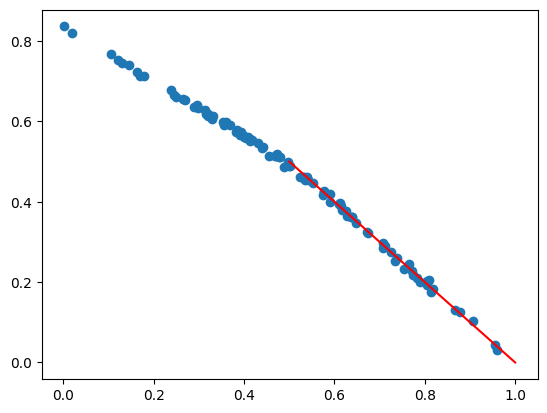

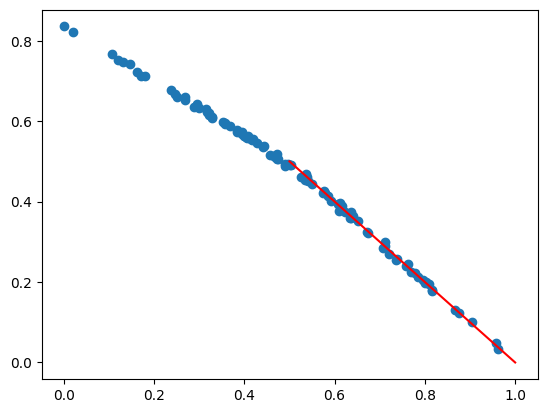

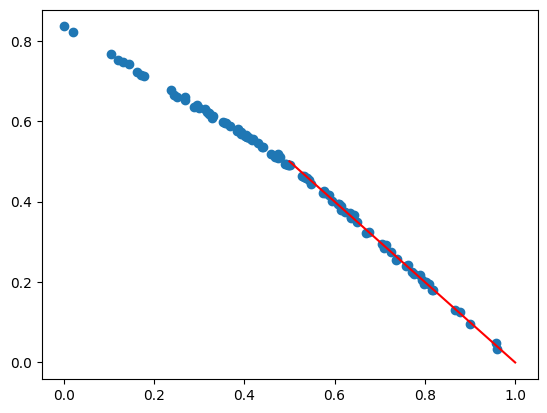

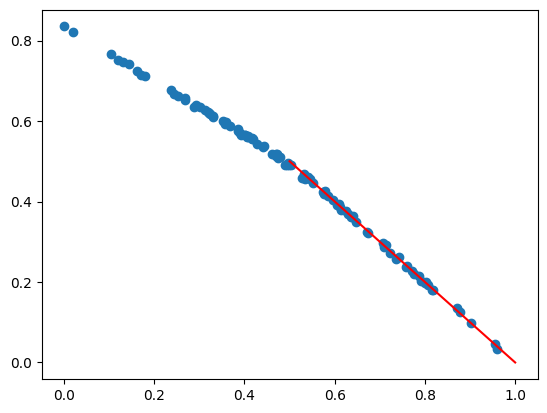

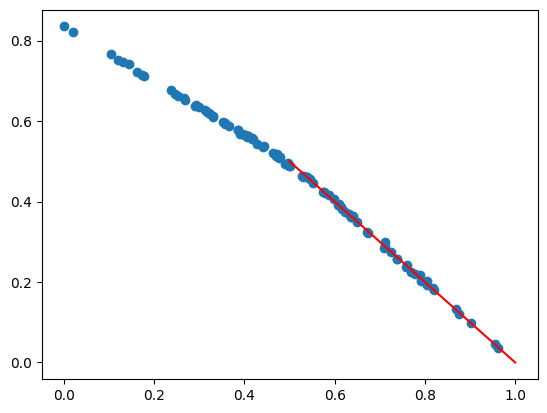

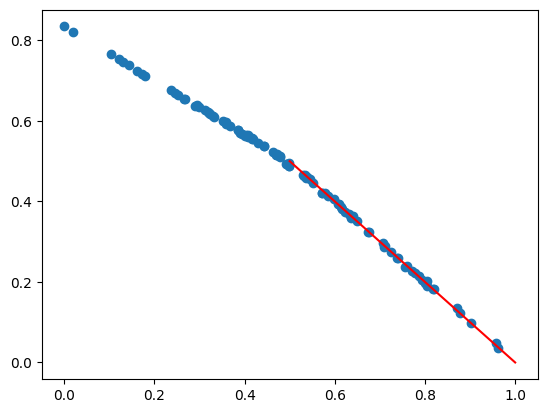

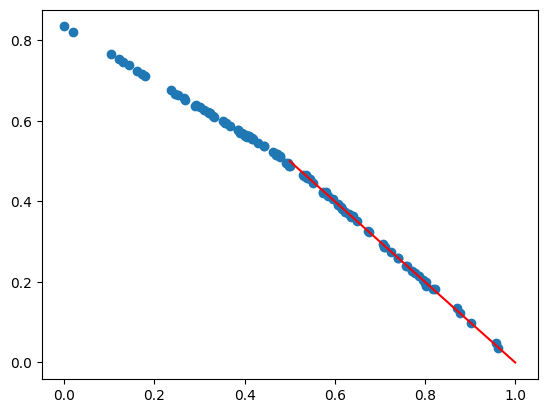

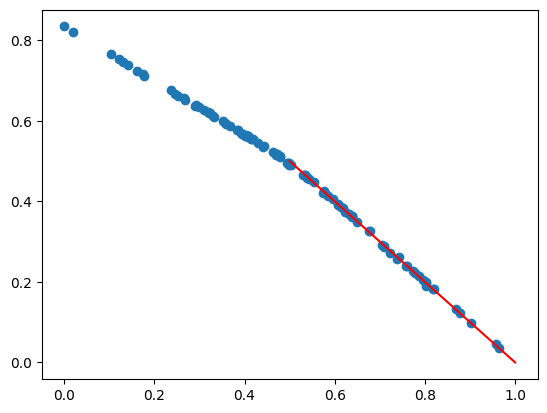

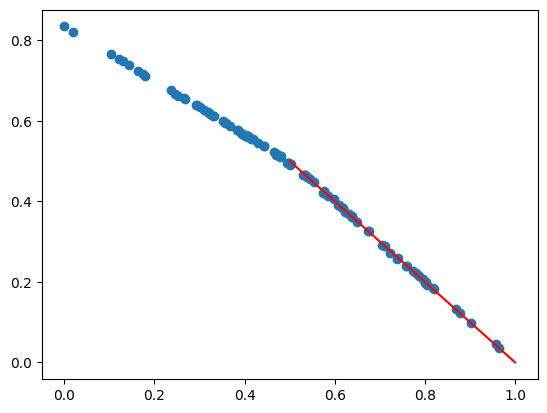

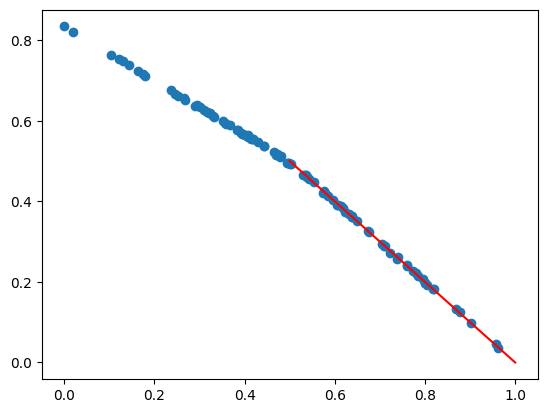

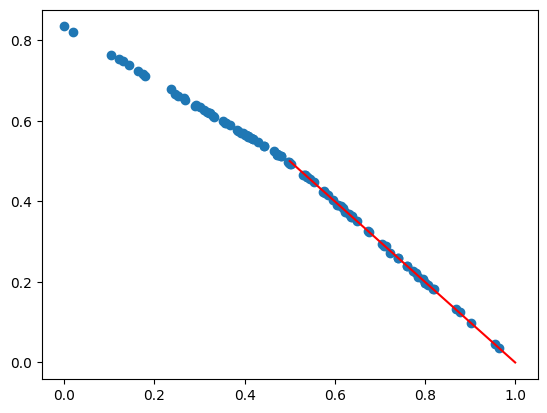

KeyboardInterrupt: ignored

In [130]:
#initializing all of the points
from ctypes import set_errno

val = np.arange(5000)
val2 = np.arange(100)
print(val)
num = 1

#https://docs.python.org/3/library/random.html

setX = np.random.uniform(low=0.0, high=1.0, size = 100)
#alpha = np.random.normal(loc = 0.5, scale = 0.25, size = 100)
setY = np.random.uniform(low=0.0, high=1.0, size = 100)
#set all of the points at once

setXY[:,0] = setX
setXY[:,1] = setY

for k in range(0,1000):

  #print(num)
  children = generateChild()
  children = np.fromiter(children, dtype=float)
  #children = childrenX

  newX = map(addChild, children, val)
  newY = map(addChild2, children, val)

  childrenX = np.fromiter(newX,dtype=float)
  childrenY = np.fromiter(newY,dtype=float)

  penP = map(pen, setX, setY)
  penK = map(pen, childrenX, childrenY)

  penaltyParent = np.fromiter(penP,dtype=float)
  penaltyKid = np.fromiter(penK, dtype=float)


  pt = map(transform, penaltyKid, children, val)
  sum1 = np.fromiter(pt, dtype=float)


  j = 0
  for i in range(5000):
    if i % 50 == 0:
      for k in range(50):
        beta[j] += sum1[i+k]
      beta[j] = float(beta[j]/50)
      j += 1
  #print(beta)
  newPX = map(addParent, setX, beta)
  newPY = map(addParent, setY, beta)

  setX = np.fromiter(newPX, dtype=float)
  setY = np.fromiter(newPY, dtype=float)

  #print(num)
  xCoor=[0.5, 1]
  if num % 10 == 0:
    plt.scatter(setX, setY)
    #plt.scatter(childrenX, childrenY, color = 'k')
    lineX = list(map(newLine, xCoor))
    #plt.scatter(setX, setY)
    plt.plot(xCoor, lineX, color='r')
    plt.show()
  num += 1
  #sum1 = sum1.reshape(5000)
